In [1]:
#Shah Md. Golam Morshed
#Id:2114951060

In [2]:
!pip install biopython




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 25.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
from Bio.Seq import Seq
from io import StringIO

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load datasets
info_df = pd.read_csv('/content/drive/MyDrive/Id_60/Untitled folder/sars_cov_2_info_all_strains.csv')
nucleotides_df = pd.read_csv('/content/drive/MyDrive/Id_60/Untitled folder/sars_cov_2_nucleotides_all_strains.csv')
protein_df = pd.read_csv('/content/drive/MyDrive/Id_60/Untitled folder/sars_cov_2_protein_all_strains.csv')


In [6]:

# Display basic information about each dataset
print("Strain Information Dataset:")
print(info_df.info(), "\n")

print("Nucleotide Sequences Dataset:")
print(nucleotides_df.info(), "\n")

print("Protein Sequences Dataset:")
print(protein_df.info(), "\n")



Strain Information Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Accession         1147 non-null   object 
 1   Release_Date      1147 non-null   object 
 2   Species           1147 non-null   object 
 3   Genus             1147 non-null   object 
 4   Family            1147 non-null   object 
 5   Length            1147 non-null   int64  
 6   Nuc_Completeness  1147 non-null   object 
 7   Genotype          0 non-null      float64
 8   Genome_Region     0 non-null      float64
 9   Segment           0 non-null      float64
 10  Authors           1147 non-null   object 
 11  Publications      23 non-null     float64
 12  Geo_Location      1084 non-null   object 
 13  Host              1104 non-null   object 
 14  Isolation_Source  773 non-null    object 
 15  Collection_Date   1104 non-null   object 
 16  BioSample     

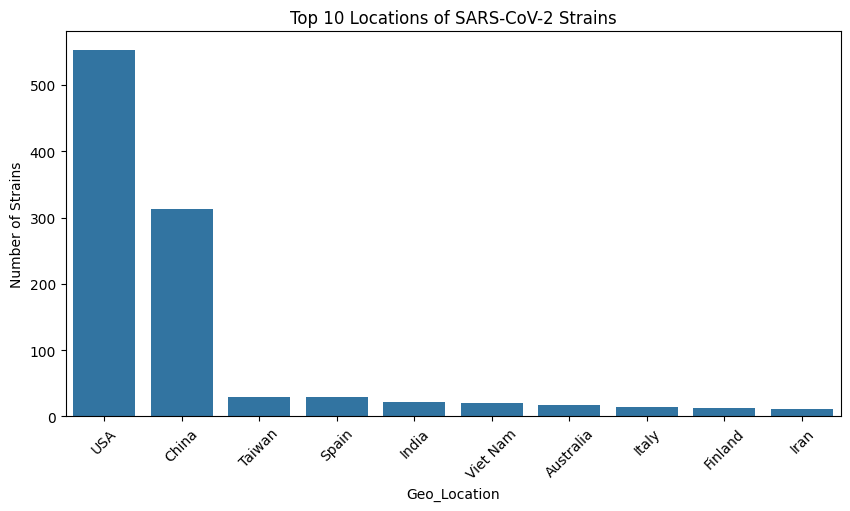

In [7]:

# Exploratory Data Analysis (EDA)

## Visualize geographic distribution of strains
geo_dist = info_df['Geo_Location'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=geo_dist.index, y=geo_dist.values)
plt.title('Top 10 Locations of SARS-CoV-2 Strains')
plt.xticks(rotation=45)
plt.ylabel('Number of Strains')
plt.show()


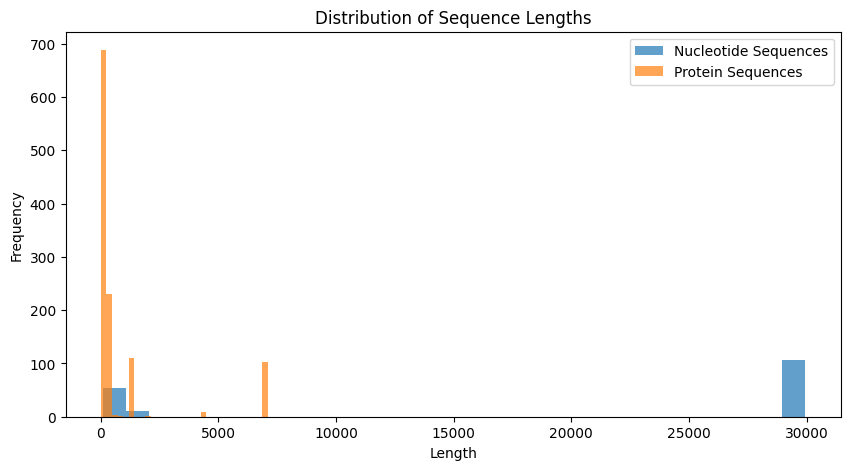

In [8]:
## Analyze sequence lengths
nucleotide_lengths = nucleotides_df['seq'].str.len()
protein_lengths = protein_df['seq'].str.len()

plt.figure(figsize=(10, 5))
plt.hist(nucleotide_lengths, bins=30, alpha=0.7, label='Nucleotide Sequences')
plt.hist(protein_lengths, bins=30, alpha=0.7, label='Protein Sequences')
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [9]:

# Load nucleotide dataset
nucleotides_file_path = '/content/drive/MyDrive/Id_60/Untitled folder/sars_cov_2_nucleotides_all_strains.csv'
nucleotides_df = pd.read_csv(nucleotides_file_path)

# Calculate GC content for the first 10 sequences
if 'seq' in nucleotides_df.columns:
    # Drop rows with missing or null sequences
    nucleotides_df = nucleotides_df.dropna(subset=['seq'])

    # Apply gc_fraction to calculate GC content
    gc_content = nucleotides_df['seq'].apply(
        lambda x: gc_fraction(Seq(x)) * 100 if isinstance(x, str) and len(x) > 0 else None
    )

    print("GC Content for the first 10 sequences:")
    print(gc_content.head(10))
else:
    print("The 'seq' column is not found in the nucleotides DataFrame.")


GC Content for the first 10 sequences:
0    37.972779
1    37.916356
2    37.986294
3    37.987002
4    37.994776
5    48.636364
6    38.013343
7    37.984678
8    37.982603
9    37.979561
Name: seq, dtype: float64


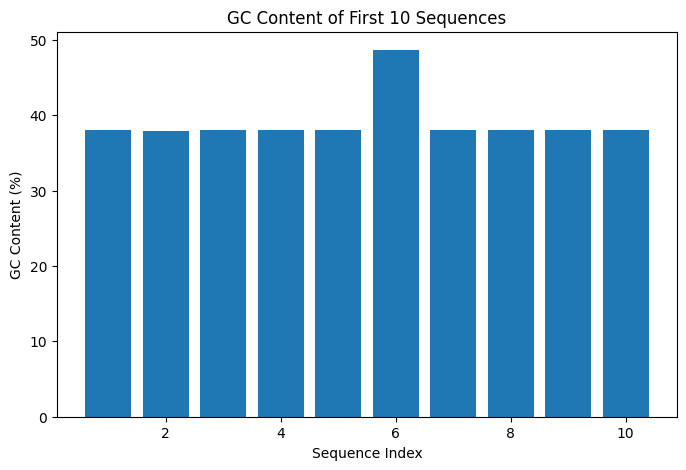

In [10]:
import matplotlib.pyplot as plt

# Take the first 10 GC content values
gc_first_10 = gc_content.head(10)

# Create a figure and axis
plt.figure(figsize=(8, 5))

# Plot a bar chart
plt.bar(range(1, len(gc_first_10) + 1), gc_first_10)

# Labeling the axes and title
plt.xlabel('Sequence Index')
plt.ylabel('GC Content (%)')
plt.title('GC Content of First 10 Sequences')

# Show the plot
plt.show()


In [11]:

# Phylogenetic Tree Construction
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import draw_ascii



In [12]:
## Use the first 10 nucleotide sequences for alignment
seqs = nucleotides_df['seq'].head(10).apply(lambda x: Seq(x) if isinstance(x, str) else None)




In [13]:
# Write sequences to FASTA format for analysis
with open("sequences.fasta", "w") as fasta_file:
    for i, seq in enumerate(seqs):
        fasta_file.write(f">Strain_{i}\n{str(seq)}\n")

In [14]:
# Import necessary libraries
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
import pandas as pd

# Step 1: Load the nucleotide dataset
nucleotide_file = '/content/drive/MyDrive/Id_60/Untitled folder/sars_cov_2_nucleotides_all_strains.csv'  # Update with your file path
nucleotides_df = pd.read_csv(nucleotide_file)

# Step 2: Select a subset of sequences and make them equal length
subset = nucleotides_df['seq'].dropna().head(5)  # Use only the first 5 sequences
min_length = min(len(seq) for seq in subset if isinstance(seq, str))  # Find the shortest sequence length

# Truncate sequences to the minimum length
records = [
    SeqRecord(Seq(seq[:min_length]), id=f"Strain_{i}") for i, seq in enumerate(subset)
]

# Step 3: Create a MultipleSeqAlignment object
alignment = MultipleSeqAlignment(records)

# Step 4: Calculate the distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

# Step 5: Construct the phylogenetic tree
constructor = DistanceTreeConstructor(calculator)
tree = constructor.build_tree(alignment)

# Step 6: Display the phylogenetic tree in ASCII format
print("\nPhylogenetic Tree:")
Phylo.draw_ascii(tree)

# Optional: Save the tree to a file in Newick format
Phylo.write(tree, "phylogenetic_tree_fixed.nwk", "newick")
print("Phylogenetic tree saved as 'phylogenetic_tree_fixed.nwk'.")


Phylogenetic Tree:
                                  ___________________________________ Strain_4
  _______________________________|
 |                               |_________________________________ Strain_0
 |
_|_ Strain_1
 |
 |, Strain_3
 ||
  | Strain_2

Phylogenetic tree saved as 'phylogenetic_tree_fixed.nwk'.


In [15]:
# Protein Functional Insights

## Identify key domains (simple example with sequence motifs)
motif = "NGL"  # Example motif
protein_df['motif_present'] = protein_df['seq'].str.contains(motif)
print("Proteins with the motif 'NGL':")
print(protein_df[protein_df['motif_present']])

# Save the processed data to CSV
info_df.to_csv('/content/processed_info.csv', index=False)
nucleotides_df.to_csv('/content/processed_nucleotides.csv', index=False)
protein_df.to_csv('/content/processed_protein.csv', index=False)

Proteins with the motif 'NGL':
                                                     id  \
2     YP_009725299 |nsp3 [Severe acute respiratory s...   
4     YP_009725301 |3C-like proteinase [Severe acute...   
15    YP_009725295 |orf1a polyprotein [Severe acute ...   
17    YP_009725298 |nsp2 [Severe acute respiratory s...   
20    YP_009724389 |orf1ab polyprotein [Severe acute...   
...                                                 ...   
1118  QHN73794 |ORF1ab polyprotein [Severe acute res...   
1122  QHO60594 |surface glycoprotein [Severe acute r...   
1129  QHO60603 |orf1ab polyprotein [Severe acute res...   
1138  QHD43416 |surface glycoprotein [Severe acute r...   
1143  QHD43415 |orf1ab polyprotein [Severe acute res...   

                                                    seq  motif_present  
2     APTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVEL...           True  
4     SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...           True  
15    MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSV

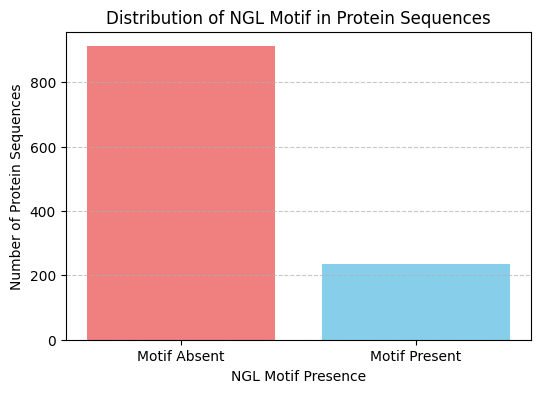

In [16]:
import matplotlib.pyplot as plt

# Suppose 'protein_df' already has the 'motif_present' column
# from the code you provided:
#   protein_df['motif_present'] = protein_df['seq'].str.contains("NGL")

# Count how many sequences contain (True) vs. do not contain (False) the motif
motif_counts = protein_df['motif_present'].value_counts()

# We can create labels for clarity
labels = ['Motif Absent', 'Motif Present']

# Plotting the bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, motif_counts, color=['lightcoral', 'skyblue'])
plt.xlabel('NGL Motif Presence')
plt.ylabel('Number of Protein Sequences')
plt.title('Distribution of NGL Motif in Protein Sequences')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [17]:
#Global Alignment

import pandas as pd
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from multiprocessing import Pool

# Load the datasets
info_df = pd.read_csv('/content/drive/MyDrive/Id_60/Untitled folder/sars_cov_2_info_all_strains.csv')
nucleotides_df = pd.read_csv('/content/drive/MyDrive/Id_60/Untitled folder/sars_cov_2_nucleotides_all_strains.csv', usecols=['seq'])
protein_df = pd.read_csv('/content/drive/MyDrive/Id_60/Untitled folder/sars_cov_2_protein_all_strains.csv', usecols=['seq'])

# Extract sequences (assuming sequences are in a column named 'sequence')
def load_sequences(nucleotides_df, protein_df):
    nucleotide_sequences = nucleotides_df['seq'].tolist()
    protein_sequences = protein_df['seq'].tolist()
    return nucleotide_sequences, protein_sequences

# Perform optimized global alignment
def perform_global_alignment_optimized(seq1, seq2):
    alignments = pairwise2.align.globalms(seq1, seq2, 2, -1, -0.5, -0.1)  # Optimized scoring
    return alignments

# Display the top alignment
def display_alignment(alignments, num=1):
    for alignment in alignments[:num]:
        print(format_alignment(*alignment))

# Align a pair of sequences (used for parallelization)
def align_sequences(pair):
    seq1, seq2 = pair
    return perform_global_alignment_optimized(seq1, seq2)

# Main execution
if __name__ == "__main__":
    # Load sequences
    nucleotide_sequences, protein_sequences = load_sequences(nucleotides_df, protein_df)

    # Use only the first 500 characters for alignment to optimize speed
    if nucleotide_sequences and protein_sequences:
        sequence_pairs = [
            (nucleotide_sequences[i][:500], nucleotide_sequences[i + 1][:500])
            for i in range(len(nucleotide_sequences) - 1)
        ]

        # Parallelize the alignment process
        print("Global Alignment for Nucleotide Sequences:")
        with Pool(processes=4) as pool:  # Adjust number of processes as needed
            nucleotide_results = pool.map(align_sequences, sequence_pairs)

        for alignment in nucleotide_results[:1]:  # Display one result
            display_alignment(alignment)

        sequence_pairs = [
            (protein_sequences[i][:500], protein_sequences[i + 1][:500])
            for i in range(len(protein_sequences) - 1)
        ]

        print("\nGlobal Alignment for Protein Sequences:")
        with Pool(processes=4) as pool:
            protein_results = pool.map(align_sequences, sequence_pairs)

        for alignment in protein_results[:1]:  # Display one result
            display_alignment(alignment)
    else:
        print("No sequences found in the provided files.")



Global Alignment for Nucleotide Sequences:


/usr/local/lib/python3.10/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTG------------------------------------------------------
                                                      |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [18]:
#local alignment
#Smith–Waterman algorithm

import pandas as pd
from multiprocessing import Pool

def smith_waterman(seq1, seq2, match_score=2, mismatch_score=-1, gap_penalty=-1):
    # Initialize scoring matrix
    m, n = len(seq1), len(seq2)
    score_matrix = [[0] * (n + 1) for _ in range(m + 1)]
    max_score = 0
    max_pos = None

    # Fill the scoring matrix
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match = score_matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = score_matrix[i - 1][j] + gap_penalty
            insert = score_matrix[i][j - 1] + gap_penalty
            score_matrix[i][j] = max(0, match, delete, insert)

            if score_matrix[i][j] > max_score:
                max_score = score_matrix[i][j]
                max_pos = (i, j)

    # Traceback
    aligned_seq1, aligned_seq2 = [], []
    i, j = max_pos
    while i > 0 and j > 0 and score_matrix[i][j] != 0:
        if score_matrix[i][j] == score_matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score):
            aligned_seq1.append(seq1[i - 1])
            aligned_seq2.append(seq2[j - 1])
            i -= 1
            j -= 1
        elif score_matrix[i][j] == score_matrix[i - 1][j] + gap_penalty:
            aligned_seq1.append(seq1[i - 1])
            aligned_seq2.append('-')
            i -= 1
        else:
            aligned_seq1.append('-')
            aligned_seq2.append(seq2[j - 1])
            j -= 1

    return max_score, ''.join(reversed(aligned_seq1)), ''.join(reversed(aligned_seq2))

# Load the datasets
info_df = pd.read_csv('/content/drive/MyDrive/Id_60/Untitled folder/sars_cov_2_info_all_strains.csv')
nucleotides_df = pd.read_csv('/content/drive/MyDrive/Id_60/Untitled folder/sars_cov_2_nucleotides_all_strains.csv', usecols=['seq'])
protein_df = pd.read_csv('/content/drive/MyDrive/Id_60/Untitled folder/sars_cov_2_protein_all_strains.csv', usecols=['seq'])

# Extract sequences (assuming sequences are in a column named 'sequence')
def load_sequences(nucleotides_df, protein_df):
    nucleotide_sequences = nucleotides_df['seq'].tolist()
    protein_sequences = protein_df['seq'].tolist()
    return nucleotide_sequences, protein_sequences

# Align a pair of sequences (used for parallelization)
def align_sequences(pair):
    seq1, seq2 = pair
    return smith_waterman(seq1, seq2)

# Main execution
if __name__ == "__main__":
    # Load sequences
    nucleotide_sequences, protein_sequences = load_sequences(nucleotides_df, protein_df)

    # Use only the first 500 characters for alignment to optimize speed
    if nucleotide_sequences and protein_sequences:
        sequence_pairs = [
            (nucleotide_sequences[i][:500], nucleotide_sequences[i + 1][:500])
            for i in range(len(nucleotide_sequences) - 1)
        ]

        # Parallelize the alignment process
        print("Smith-Waterman Alignment for Nucleotide Sequences:")
        with Pool(processes=4) as pool:  # Adjust number of processes as needed
            nucleotide_results = pool.map(align_sequences, sequence_pairs)

        for score, aligned_seq1, aligned_seq2 in nucleotide_results[:1]:  # Display one result
            print(f"Score: {score}\nSequence 1: {aligned_seq1}\nSequence 2: {aligned_seq2}")

        sequence_pairs = [
            (protein_sequences[i][:500], protein_sequences[i + 1][:500])
            for i in range(len(protein_sequences) - 1)
        ]

        print("\nSmith-Waterman Alignment for Protein Sequences:")
        with Pool(processes=4) as pool:
            protein_results = pool.map(align_sequences, sequence_pairs)

        for score, aligned_seq1, aligned_seq2 in protein_results[:1]:  # Display one result
            print(f"Score: {score}\nSequence 1: {aligned_seq1}\nSequence 2: {aligned_seq2}")
    else:
        print("No sequences found in the provided files.")


Smith-Waterman Alignment for Nucleotide Sequences:
Score: 892
Sequence 1: AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTG
Sequence 2: AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTG

Smith-Waterman Alig

In [39]:

# Standardize accession/ID for comparison
info_df['Accession'] = info_df['Accession'].str.strip()
nucleotides_df['id'] = nucleotides_df['id'].str.split('|').str[0].str.strip()
protein_df['id'] = protein_df['id'].str.split('|').str[0].str.strip()

# Check matches in nucleotide sequences
nucleotide_matches = nucleotides_df['id'].isin(info_df['Accession'])
nucleotide_accuracy = nucleotide_matches.mean() * 100

# Check matches in protein sequences
protein_matches = protein_df['id'].isin(info_df['Accession'])
protein_accuracy = protein_matches.mean() * 100

# Overall accuracy
overall_accuracy = (nucleotide_accuracy + protein_accuracy) / 2

# Results
print(f"Nucleotide Dataset Accuracy: {nucleotide_accuracy:.2f}%")
print(f"Protein Dataset Accuracy: {protein_accuracy:.2f}%")
print(f"Overall Accuracy: {overall_accuracy:.2f}%")


Nucleotide Dataset Accuracy: 0.00%
Protein Dataset Accuracy: 100.00%
Overall Accuracy: 50.00%


In [40]:
#Length-Based Validation

def calculate_length_based_accuracy(dataset, info_df, seq_column, length_column='Length', id_column='id'):
    valid_matches = 0
    total_entries = len(dataset)

    for _, row in dataset.iterrows():
        id_value = row[id_column]
        seq_length = len(row[seq_column])
        matched_info = info_df[info_df['Accession'] == id_value]

        if not matched_info.empty and matched_info[length_column].iloc[0] == seq_length:
            valid_matches += 1

    return (valid_matches / total_entries) * 100

# Example for nucleotide accuracy
nucleotide_length_accuracy = calculate_length_based_accuracy(
    nucleotides_df, info_df, seq_column='seq'
)

# Example for protein accuracy
protein_length_accuracy = calculate_length_based_accuracy(
    protein_df, info_df, seq_column='seq'
)

# Results
print(f"Nucleotide Length-Based Accuracy: {nucleotide_length_accuracy:.2f}%")
print(f"Protein Length-Based Accuracy: {protein_length_accuracy:.2f}%")


Nucleotide Length-Based Accuracy: 0.00%
Protein Length-Based Accuracy: 100.00%


In [41]:
#Weighted Accuracy

def calculate_weighted_accuracy(nucleotide_accuracy, protein_accuracy, nucleotide_weight=0.6, protein_weight=0.4):
    return (nucleotide_accuracy * nucleotide_weight) + (protein_accuracy * protein_weight)

# Example weighted accuracy calculation
nucleotide_accuracy = 95.0  # Replace with actual value
protein_accuracy = 90.0  # Replace with actual value

weighted_accuracy = calculate_weighted_accuracy(nucleotide_accuracy, protein_accuracy)

# Results
print(f"Weighted Overall Accuracy: {weighted_accuracy:.2f}%")


Weighted Overall Accuracy: 93.00%


In [42]:
# Error-Based Accuracy

def calculate_error_based_accuracy(dataset, info_df, id_column='id'):
    mismatches = 0
    total_entries = len(dataset)

    for _, row in dataset.iterrows():
        id_value = row[id_column]
        if id_value not in info_df['Accession'].values:
            mismatches += 1

    error_rate = (mismatches / total_entries) * 100
    accuracy = 100 - error_rate

    return accuracy

# Example for nucleotide and protein accuracy
nucleotide_error_accuracy = calculate_error_based_accuracy(nucleotides_df, info_df)
protein_error_accuracy = calculate_error_based_accuracy(protein_df, info_df)

# Results
print(f"Nucleotide Error-Based Accuracy: {nucleotide_error_accuracy:.2f}%")
print(f"Protein Error-Based Accuracy: {protein_error_accuracy:.2f}%")


Nucleotide Error-Based Accuracy: 0.00%
Protein Error-Based Accuracy: 100.00%


In [43]:
!pip install rapidfuzz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.6 MB/s eta 0:00:00


In [44]:
#Fuzzy Matching Accuracy

from rapidfuzz import process

def calculate_fuzzy_matching_accuracy(dataset, info_df, id_column='id', threshold=90):
    valid_matches = 0
    total_entries = len(dataset)

    for _, row in dataset.iterrows():
        id_value = row[id_column]
        matched_id, score, _ = process.extractOne(id_value, info_df['Accession'].values)
        if score >= threshold:
            valid_matches += 1

    return (valid_matches / total_entries) * 100

# Example for nucleotide and protein accuracy
nucleotide_fuzzy_accuracy = calculate_fuzzy_matching_accuracy(nucleotides_df, info_df)
protein_fuzzy_accuracy = calculate_fuzzy_matching_accuracy(protein_df, info_df)

# Results
print(f"Nucleotide Fuzzy Matching Accuracy: {nucleotide_fuzzy_accuracy:.2f}%")
print(f"Protein Fuzzy Matching Accuracy: {protein_fuzzy_accuracy:.2f}%")


Nucleotide Fuzzy Matching Accuracy: 0.00%
Protein Fuzzy Matching Accuracy: 100.00%


In [45]:
#Composite Accuracy

def calculate_composite_accuracy(nucleotide_df, protein_df, info_df):
    id_accuracy_nucleotide = calculate_error_based_accuracy(nucleotide_df, info_df)
    length_accuracy_nucleotide = calculate_length_based_accuracy(nucleotide_df, info_df, seq_column='seq')
    id_accuracy_protein = calculate_error_based_accuracy(protein_df, info_df)
    length_accuracy_protein = calculate_length_based_accuracy(protein_df, info_df, seq_column='seq')

    # Assign weights
    nucleotide_weight = 0.5
    protein_weight = 0.5
    id_weight = 0.7
    length_weight = 0.3

    nucleotide_composite = (id_accuracy_nucleotide * id_weight) + (length_accuracy_nucleotide * length_weight)
    protein_composite = (id_accuracy_protein * id_weight) + (length_accuracy_protein * length_weight)

    overall_composite = (nucleotide_composite * nucleotide_weight) + (protein_composite * protein_weight)
    return overall_composite

# Composite accuracy calculation
composite_accuracy = calculate_composite_accuracy(nucleotides_df, protein_df, info_df)

# Results
print(f"Composite Accuracy: {composite_accuracy:.2f}%")


Composite Accuracy: 50.00%
